In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target
print("Features Shape:", X.shape)
print("Labels Shape:", y.shape)
print("Classes:", data.target_names)

Features Shape: (569, 30)
Labels Shape: (569,)
Classes: ['malignant' 'benign']


In [3]:
import collections
print(collections.Counter(y))

Counter({np.int64(1): 357, np.int64(0): 212})


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (455, 30)
Test shape: (114, 30)


In [6]:
svm_linear = SVC(kernel='linear', probability=True)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))

Linear SVM Accuracy: 0.956140350877193


In [7]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))
print("\nClassification Report:\n", classification_report(y_test, y_pred_linear))

Confusion Matrix:
 [[41  2]
 [ 3 68]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [8]:
svm_rbf = SVC(kernel='rbf', probability=True)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))

RBF SVM Accuracy: 0.9736842105263158


In [9]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1]
}
grid = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'C': 10, 'gamma': 0.01}
Best Score: 0.9736263736263737


In [10]:
best_svm = grid.best_estimator_
y_best = best_svm.predict(X_test)

print("Tuned Model Accuracy:", accuracy_score(y_test, y_best))

Tuned Model Accuracy: 0.9824561403508771


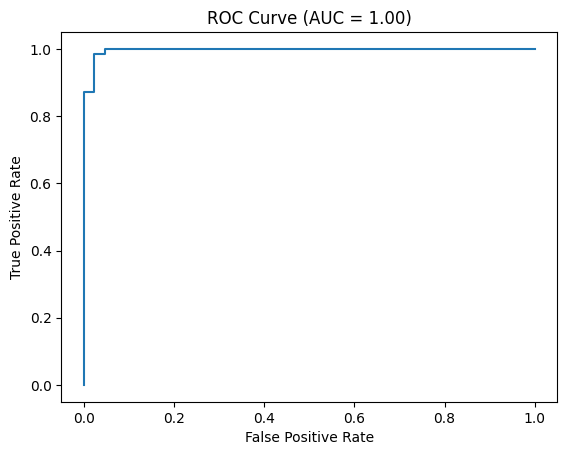

AUC Score: 0.9967245332459875


In [11]:
y_prob = best_svm.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (AUC = {:.2f})".format(roc_auc))
plt.show()
print("AUC Score:", roc_auc)

In [12]:
import joblib
joblib.dump(scaler, "scaler.pkl")
joblib.dump(best_svm, "svm_model.pkl")
print("Model saved successfully!")

Model saved successfully!
